# Regression: Predicting pipe pressure drop

This notebook generates a small synthetic pipe-flow dataset (flow rate, density, viscosity, length, diameter),
computes a simplified pressure-drop proxy, fits a linear regression, and visualizes predictions vs. ground truth.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

plt.rcParams['figure.figsize'] = (6, 4)

In [2]:
def compute_pressure_drop(flow_rate, density, viscosity, length, diameter):
    area = np.pi * (diameter / 2) ** 2
    velocity = flow_rate / area
    dp = 0.5 * density * velocity ** 2 * (length / diameter)
    dp += viscosity * flow_rate / (diameter ** 2)
    return dp

rng = np.random.RandomState(0)
n = 500
flow_rate = rng.uniform(0.01, 0.5, size=n)
density = rng.uniform(950.0, 1050.0, size=n)
viscosity = rng.uniform(1e-4, 5e-3, size=n)
length = rng.uniform(0.5, 10.0, size=n)
diameter = rng.uniform(0.01, 0.2, size=n)
X = np.vstack([flow_rate, density, viscosity, length, diameter]).T
y = np.array([compute_pressure_drop(q, rho, mu, L, D) for q, rho, mu, L, D in X])
y += rng.normal(scale=0.05 * np.mean(y), size=y.shape)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Linear regression MSE: {mse:.4e}')
print('Coefficients:', model.coef_)

Linear regression MSE: 5.5822e+23
Coefficients: [ 4.02943625e+11  4.34888311e+08  2.95307140e+13  9.51713220e+09
 -1.94062563e+12]


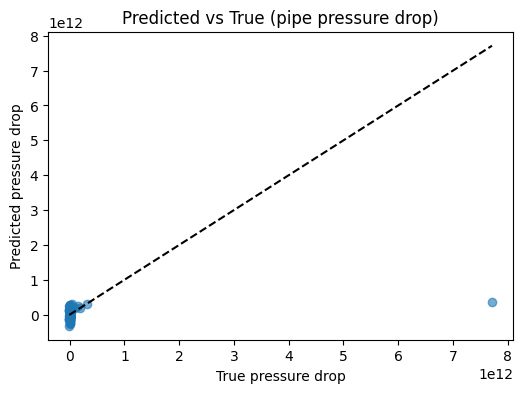

In [4]:
plt.scatter(y_test, y_pred, alpha=0.6)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('True pressure drop')
plt.ylabel('Predicted pressure drop')
plt.title('Predicted vs True (pipe pressure drop)')
plt.show()